# MATH 210 Introduction to Mathematical Computing

## February 1, 2016

Today's Agenda:

More about NumPy arrays:

1. Indexing and Slicing
2. Array Methods
    * Arithmetic: `sum`, `cumsum`, `prod` and `cumprod`
    * Statistics: `min`, `max`, `mean`, and `std`
    * Shape and Size: `size`, `shape`, `ndim`
3. Examples: Plotting Random Walks with Matplotlib
4. Exercises

For more information, check out the following references:

* [NumPy](http://www.numpy.org)
* [SciPy](http://www.scipy.org)
* [SciPy Lecture Notes](http://www.scipy-lectures.org/)

## Import NumPy and Matplotlib

As always, we must import the `numpy` and `matplotlib.pyplot` packages into our workspace in order to use them:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We also must enter the following command to display our `matplotlib` plots in the notebook:

In [2]:
%matplotlib inline

## 1. Indexing and Slicing NumPy Arrays

### Indexing

We can access the entries in a NumPy array using square brackets. Remember, all array indices in Python begin at index 0.

In [3]:
arr = np.array([[1,2,3],[4,5,6]])
print(arr)

[[1 2 3]
 [4 5 6]]


In [4]:
arr[0,0]

1

In [5]:
arr[1,1]

5

In [6]:
arr[0,2]

3

### Slicing

We can access subarrays by what's known as *slicing*. Let's use the NumPy function `np.random.randint` to pratice slicing with a 4 by 8 array with integer entries sampled randomly from the closed interval $[-5,5]$.

In [7]:
arr2 = np.random.randint(-5,6,[4,8])
print(arr2)

[[ 2  0 -1  4  0  2 -3  0]
 [-1  0 -5  2 -1  2  3 -1]
 [ 2 -2 -4 -1 -5 -2 -3  0]
 [ 1  2  3  5  2  2  2 -5]]


In [8]:
# The row at index 0
arr2[0,:]

array([ 2,  0, -1,  4,  0,  2, -3,  0])

In [9]:
# The row at index 3
arr2[3,:]

array([ 1,  2,  3,  5,  2,  2,  2, -5])

In [10]:
# The column at index 3
arr2[:,3]

array([ 4,  2, -1,  5])

In [11]:
# The subarray from row index 1 (inclusive) to 5 (exclusive)
# and form column index 1 (inclusive) to 4 (exclusive)
arr2[1:5,1:4]

array([[ 0, -5,  2],
       [-2, -4, -1],
       [ 2,  3,  5]])

In [12]:
# The subarray at all even row indices and odd column indices
# The colon notation is start:stop:increment (if stop is not indicated, then the slice goes to the end)
arr2[0::2,1::2]

array([[ 0,  4,  2,  0],
       [-2, -1, -2,  0]])

## 2. Array Methods

Remember, in Python, everything is an **object**. Objects have **attributes** (ie. values associated with the object) and **methods** (ie. functions associated with the object). We access an object's methods using the dot notation: `object.method()`. And we access an object's attribures using the dot notation (but without parentheses): `object.attribute`.

For example, given a 2-dimensional array (in other words, a matrix) called `my_array`, we could add up all the entries of `my_array` using the method `my_array.sum()` and we could find out the shape of `my_array` by calling for its shape attribute `my_array.size`:

In [13]:
# Create a 3 by 7 array of random zeros and ones
my_array = np.random.randint(0,2,[3,7])
print(my_array)

[[1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0]
 [0 1 1 0 0 0 1]]


In [14]:
# Call the sum method
my_array.sum()

10

In [15]:
# Access the size attribute
my_array.size

21

See the full list of NumPy array methods in the NumPy [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#array-methods).

### Arithmetic Methods: `sum`, `cumsum`, `prod` and `cumprod`

We can compute the sum of all the entries of an array, or we can compute the sum along any of the axes. The axes of an array are:

![axes](http://www.scipy-lectures.org/_images/reductions.png)

(The image above is taken from the [SciPy Lecture Notes](http://www.scipy-lectures.org).)

Let's generate a matrix with random entries and then compute various sums across the axes of the array.

In [16]:
arr3 = np.random.randint(0,6,[3,5])
print(arr3)

[[4 1 1 1 3]
 [1 5 5 1 5]
 [0 2 2 2 3]]


In [17]:
arr3.sum()

36

In [18]:
arr3.sum(axis=0)

array([ 5,  8,  8,  4, 11])

In [19]:
arr3.sum(axis=1)

array([10, 17,  9])

We can compute the cumulative sum of all the entries of an array, or we can compute the cumulative sum along any of the axes:

In [20]:
arr3.cumsum()

array([ 4,  5,  6,  7, 10, 11, 16, 21, 22, 27, 27, 29, 31, 33, 36])

In [21]:
arr3.cumsum(axis=0)

array([[ 4,  1,  1,  1,  3],
       [ 5,  6,  6,  2,  8],
       [ 5,  8,  8,  4, 11]])

In [22]:
arr3.cumsum(axis=1)

array([[ 4,  5,  6,  7, 10],
       [ 1,  6, 11, 12, 17],
       [ 0,  2,  4,  6,  9]])

Similarly, we can compute the product or the cumulative product of all the entries in an array or along any of the axes:

In [23]:
print(arr3)

[[4 1 1 1 3]
 [1 5 5 1 5]
 [0 2 2 2 3]]


In [24]:
arr3.prod()

0

In [25]:
arr3.prod(axis=0)

array([ 0, 10, 10,  2, 45])

In [26]:
arr3.prod(axis=1)

array([ 12, 125,   0])

In [27]:
arr3.cumprod(axis=1)

array([[  4,   4,   4,   4,  12],
       [  1,   5,  25,  25, 125],
       [  0,   0,   0,   0,   0]])

**Example.** Use the NumPy function `np.arange` and the array method `prod` to define a function called `factorial` which takes an integer $n$ and returns the factorial $n!$.

In [28]:
def factorial(n):
    if n < 0:
        print(n,'is a negative number.')
    elif n == 0:
        return 1
    else:
        return np.arange(1,n+1).prod()

In [29]:
for n in range(0,7):
    print(factorial(n))

1
1
2
6
24
120
720


### Statistical Methods: `min`, `max`, `mean`, `median` and `std`

The statistical array methods work similarly to the array methods described above:

In [30]:
arr4 = np.random.randint(-10,11,15)
print(arr4)

[  2 -10   6   5   7   4  10   5   1   0   2   7   2  10   8]


In [31]:
arr4.min()

-10

In [32]:
arr4.max()

10

In [33]:
arr4.mean()

3.9333333333333331

In [34]:
arr4.sum() / arr4.size

3.9333333333333331

In [35]:
arr4.std()

4.7953681355611844

In [36]:
arr5 = np.random.randint(-4,4,[3,10])
print(arr2)

[[ 2  0 -1  4  0  2 -3  0]
 [-1  0 -5  2 -1  2  3 -1]
 [ 2 -2 -4 -1 -5 -2 -3  0]
 [ 1  2  3  5  2  2  2 -5]]


In [37]:
arr5.min(axis=0)

array([-3,  0, -4, -4, -3, -2, -4, -4,  2, -3])

In [38]:
arr5.max(axis=1)

array([3, 3, 3])

In [39]:
arr5.mean(axis=1)

array([-0.5,  0. ,  0.2])

### Shape Attributes: `size`, `shape`, `ndim`

Array attributes include:
* `size` - total nuber of entries in the array
* `shape` - the number of indices in each dimension
* `ndim` - the number of dimension of the array

In [40]:
arr6 = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(arr6)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [41]:
arr6.size

12

In [42]:
arr6.ndim

2

In [43]:
arr6.shape

(3, 4)

## 3. Examples: Plotting Random Walks with Matplotlib

We can simulate a [random walk](https://en.wikipedia.org/wiki/Random_walk) by talking the cumulative sum of a 1-dimensional array of random numbers sampled from the standard normal distribution. In other words, we can think of the steps in a random walk as a sequence of random numbers and then the position of the random walk is the sum of the all the previous steps.

To simulate a random walk:

1. Generate a random sequence of steps using the standard normal distribution
2. Compute the walk via the cumulative sum array method
3. Plot the result using Matplotlib's plotting command `plt.plot`.

### Example 1: A Single Random Walk with 20 Steps

In [44]:
steps = np.random.randn(20)
print(steps)

[-0.05256645  0.25283172 -0.24640158  1.27476437 -0.39573007  0.17625835
 -0.51786797  0.96847655  0.0044384  -0.69776283 -0.95397438 -0.8378826
 -2.14499667  0.35606079  1.09834928 -0.17841167 -1.76570076  0.88307447
 -0.56157037  0.55226605]


In [45]:
walk = steps.cumsum()
print(walk)

[-0.05256645  0.20026527 -0.04613631  1.22862806  0.83289799  1.00915635
  0.49128838  1.45976493  1.46420332  0.76644049 -0.18753389 -1.02541649
 -3.17041316 -2.81435237 -1.7160031  -1.89441477 -3.66011553 -2.77704106
 -3.33861143 -2.78634537]


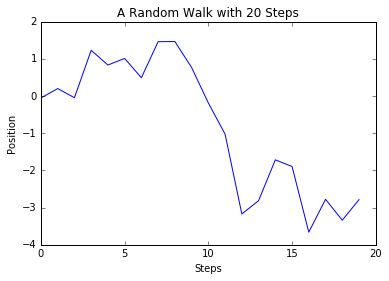

In [46]:
plt.plot(walk)
plt.title('A Random Walk with 20 Steps')
plt.xlabel('Steps')
plt.ylabel('Position');

### Example 2: $n$ Random Walks with $m$ Steps

Let's repeat the same procedure as before but now we'll write a function which takes integers $n$ and $m$ and plots $n$ random walks each with $m$ steps.

To accomplish this, we simply note that if we pass a 2-dimensional array into `plt.plot`, the result is a line plot for each column.

In [47]:
def n_random_walks(n,m):
    "Plot n random walks each with m steps."
    # Each column of the array walks represents a random walk
    # and so walks has n columns and m rows,
    # and we take the cumulative sum along the columns (axis 0)
    walks = np.random.randn(m,n).cumsum(axis=0)
    plt.plot(walks)
    plt.title( str(n) + ' Random Walks with ' + str(m) + ' Steps')
    plt.xlabel('Steps')
    plt.ylabel('Position')

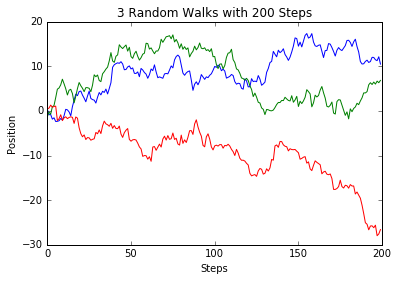

In [48]:
n_random_walks(3,200)

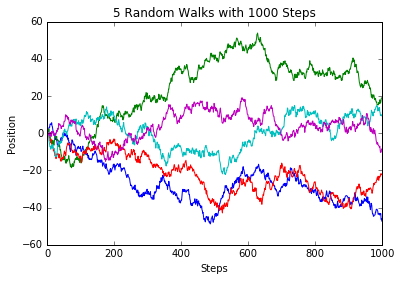

In [49]:
n_random_walks(5,1000)

## Exercises

**Exercise 1.** Generate a NumPy array with 3 rows and 8 columns with entries sampled uniformly from the closed interval $[-5,5]$ and compute:

1. The cumulative sum of all the entries
2. The cumulative product down the columns
3. The minimum value in each row
4. The average value of each column

**Exercise 2.** Define a function called `exp_partial` which takes a real number $a$ and a positive integer $N$ and returns the the $N$th partial sum of the Maclaurin series of $e^x$ evaluated at $x=a$:

$$
\sum_{n=0}^N \frac{a^n}{n!}
$$

**Exercise 3.** Use the NumPy function `np.randint` and the array method `.sum` to define a function called `roll_dice` which takes integer inputs `num_dice` and `num_rolls` and returns a NumPy array of length `num_rolls` which simulates `num_rolls` many rolls of `num_dice` may dice.

**Exercise 4.** Modify the function `roll_dice` from the previous exercise to write a function called `plot_rolls` which plots a histogram of `num_rolls` many rolls of `num_dice` many dice. (See the cell below for a "roll of a pair of dice".) For example, `plot_rolls(2,100)` plots the histogram representing 100 rolls of 2 dice. The result should show 7 as the most frequent roll, and 2 and 12 as the most infrequent. See the matplotlib documentation for [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist).

In [50]:
# A roll of a pair of dice
np.random.randint(1,7,2).sum()

8

**Exercise 5.** Write a function called `ternary_random_walk` which takes a single input `num_steps` and plots a random walk with `num_steps` many random steps sampled uniformly from the set $\{ -1,0,1\}$.

**Exercise 6.** Write a function called `custom_random_walk` which takes an integer `num_steps` and a list `step_range`
and plots a random walk with `num_steps` many random steps sampled uniformly from the set `step_range`. For example, calling the function `ternary_random_walk(100)` is the same as calling the function `custom_random_walk(100,[-1,0,1])`.